# MCMC with LightCones

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from py21cmmc.mcmc import analyse
from py21cmmc import mcmc

%load_ext autoreload
%autoreload 2

In this tutorial we demonstrate two main ideas: how to use the non-power-spectrum likelihoods provided in ``21CMMC``, and how to use more than one likelihood at a time. The extra likelihoods that we use were called "priors" in previous versions and publications, and they can help break parameter degeneracies in some cases.

In [2]:
import py21cmmc
py21cmmc.__version__

'0.1.0'

## Setting up cores and likelihoods

The various extra likelihoods provided work *best* (but not exclusively) with a Lightcone core, so we will use them in conjunction with a lightcone likelihood. This is because they typically measure the global average of a quantity (either brightness temperature or neutral fraction) as a function of redshift. 

For the core, we take the same as that used in the lightcone MCMC intro:

In [3]:
core = mcmc.CoreLightConeModule( # All core modules are prefixed by Core* and end with *Module
    redshift = 5.5,              # Lower redshift of the lightcone
    max_redshift = 8.0,          # Approximate maximum redshift of the lightcone (will be exceeded).
    user_params = dict(       
        HII_DIM = 50,         
        BOX_LEN = 125.0
    ),
    z_step_factor=1.04,          # How large the steps between evaluated redshifts are (log).
    z_heat_max=18.0,             # Completely ineffective since no spin temp or inhomogeneous recombinations.
    regenerate=False,
    nchunks=4
) # For other available options, see the docstring.

Now we instantiate several different likelihoods, beginning with the basic 1D power spectrum:

In [4]:
# Now the likelihood...
datafiles = ["data/lightcone_mcmc_data_%s.npz"%i for i in range(4)]
likelihood_ps = mcmc.Likelihood1DPowerLightcone(  # All likelihood modules are prefixed by Likelihood*
    datafile = datafiles,        # All likelihoods have this, which specifies where to write/read data
    logk=False,                 # Should the power spectrum bins be log-spaced?
    min_k=0.1,                  # Minimum k to use for likelihood
    max_k=1.0,                  # Maximum ""
    nchunks = 4,                 # Number of chunks to break the lightcone into
    simulate=True
) # For other available options, see the docstring

likelihood_planck = mcmc.LikelihoodPlanck()  # there are no options here, though some class variables
                                             # can be set to change the behaviour (eg. tau_mean, tu_sigma)
    
likelihood_mcgreer = mcmc.LikelihoodNeutralFraction()  # Again, no required options, though the options
                                                       # redshift, xHI_mean, xHI_sigma can be set. By default
                                                       # they evaluate to the McGreer values.
        
# likelihood_greig = mcmc.LikelihoodGreig()

## Running MCMC

In [5]:
model_name = "MultiLikelihoodTest"

chain = mcmc.run_mcmc(
    core, [likelihood_ps, likelihood_mcgreer],#, likelihood_planck],
    datadir='data',          # Directory for all outputs
    model_name=model_name,   # Filename of main chain output
    params=dict(             # Parameter dict as described above.
        HII_EFF_FACTOR = [30.0, 10.0, 50.0, 3.0],
        ION_Tvir_MIN = [4.7, 2, 8, 0.1],
    ), 
    walkersRatio=8,         # The number of walkers will be walkersRatio*nparams
    burninIterations=0,      # Number of iterations to save as burnin. Recommended to leave as zero.
    sampleIterations=20,    # Number of iterations to sample, per walker.
    threadCount=4,           # Number of processes to use in MCMC (best as a factor of walkersRatio)
    continue_sampling=False  # Whether to contine sampling from previous run *up to* sampleIterations.
)

Initializing init and perturb boxes for the entire chain...Existing init_boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
 done.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and rea

Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
5.9 0.02329109868684996 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.008021620992907286 0
Existing z=5.5 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.033833696203824364 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
5.9 0.019597580524150462 0
Existing z=7.8956988276342805 perturb_field boxes found and read in.
E

Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.008819817311885456 0
5.9 0.026162571182816192 0
5.9 0.27757596057018596 18.935719447215646
5.9 0.10121094999757752 0.6793369598811337
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.


Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.09293908903584684 0.43399343460457823
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.1195571240941449 1.4188204121461498
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
5.9 0.06788782147172645 0.024887091027931546
5.9 0.03688509971145875 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032

Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.017767836810943842 0
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.04039422752192391 0
5.9 0.020691054840103786 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556

Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.004375454773038037 0
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.013345675734450408 0
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.00810361466544114 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and r

5.9 0.025472268090203167 0
5.9 0.05212939994619095 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and 

5.9 0.03564162555112116 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.90824

Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field b

Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field box

Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes

Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and 

Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and 

Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.0304 perturb_

Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read 

Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes f

Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.033509708764637755 0
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.04093691351762894 0
5.9 0.03941

Existing z=5.76 perturb_field boxes found and read in.
5.9 0.026348918053657727 0
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.04235006582829554 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.22457

Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.04369335469497736 0
5.9 0.03482736325850328 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and r

Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field b

Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field box

Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes

Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
5.9 0.03669207343093217 0
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.76 perturb_fie

Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=6.0304 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.76 perturb_field boxes found and read in.
5.9 0.041817972728618896 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=5.5 perturb_field boxes found and read in.
Existing z=5.5 perturb_

Existing z=5.5 perturb_field boxes found and read in.
5.9 0.036718623078918704 0
Existing z=5.5 perturb_field boxes found and read in.
5.9 0.03988666161784586 0
5.9 0.04566222856361313 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and re

Existing z=7.8956988276342805 perturb_field boxes found and read in.
5.9 0.03766987708634177 0
5.9 0.0689170814984473 0.031805736979980494
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
5.9 0.04106714988689455 0
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.224

Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field b

Existing z=8.251526780739653 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.8956988276342805 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=7.553556565032961 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.604080640000001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=7.224573620224001 perturb_field boxes found and read in.
Existing z=6.908243865600001 perturb_field boxes found and read in.
Existing z=6.311616000000001 perturb_field bo

## Analysis

### Accessing chain data

Access the samples object within the chain (see the intro for more details):

In [6]:
samples = chain.samples

### Trace Plot

Often, for diagnostic purposes, the most useful plot to start with is the trace plot. This enables quick diagnosis of burnin time and walkers that haven't converged. The function in ``py21cmmc`` by default plots the log probability along with the various parameters that were fit. It also supports setting a starting iteration, and a thinning amount. 

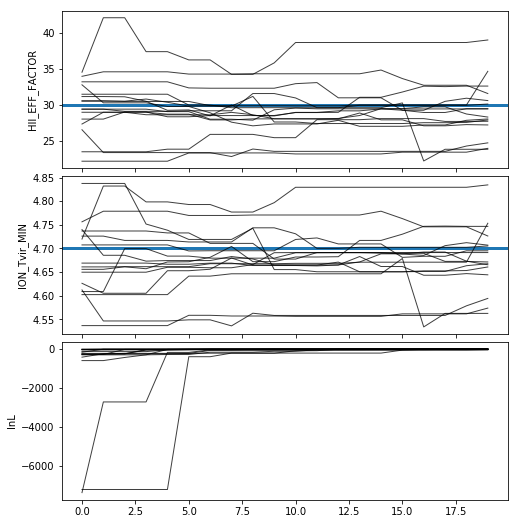

In [7]:
analyse.trace_plot(samples, include_lnl=True, start_iter=0, thin=1, colored=False, show_guess=True);

### Corner Plot

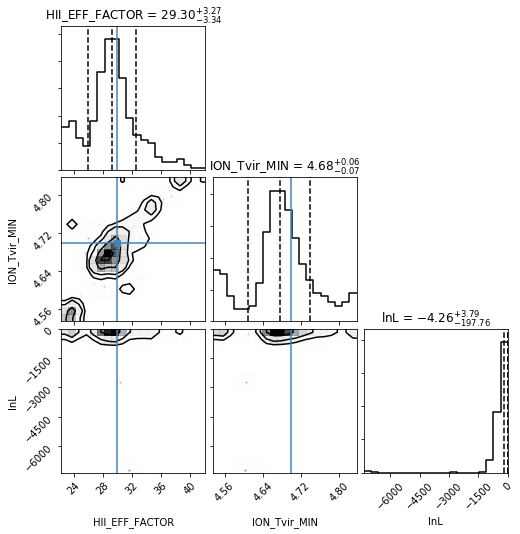

In [9]:
analyse.corner_plot(samples);